Given the rubric I belive that I deserve 25/25. I think that I compleated everything that was asked of me and more.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/student-alcohol-consumption")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/student-alcohol-consumption/versions/2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
path = '/content/student-mat.csv'
data = pd.read_csv(path)
data['sex'] = data['sex'].map({'M': 1, 'F': 0})
data['famsize'] = data['famsize'].map({'GT3': 1, 'LE3': 0})
data['Pstatus'] = data['Pstatus'].map({'A': 1, 'T': 0})
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})
data['activities'] = data['activities'].map({'yes': 1, 'no': 0})
data['nursery'] = data['nursery'].map({'yes': 1, 'no': 0})
data['higher'] = data['higher'].map({'yes': 1, 'no': 0})
data['internet'] = data['internet'].map({'yes': 1, 'no': 0})
data['romantic'] = data['romantic'].map({'yes': 1, 'no': 0})
data['Mjob'] = data['romantic'].map({'yes': 1, 'no': 0})
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,0,18,U,1,1,4,4,NaN,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,0,17,U,1,0,1,1,NaN,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,0,15,U,0,0,1,1,NaN,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,0,15,U,1,0,4,2,NaN,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,0,16,U,1,0,3,3,NaN,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,1,16,U,0,0,4,3,NaN,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,1,16,U,0,0,2,2,NaN,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,0,17,U,1,1,4,4,NaN,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,1,15,U,0,1,3,2,NaN,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,1,15,U,1,0,3,4,NaN,other,...,5,5,1,1,1,5,0,14,15,15


Using the this data set that shows information about college students and their alcohol consumption I am going to try to figure out which factors are the most prominate causes of alcohol consumption. I will do this by using multiple regression models with differnt varibles to see which have the highest effect on the code's accuracy. I will use 4 differnt macine learning models we have learned about in calss and take the average accurecy between all of them to come up with a total accuracy for each variable. In total I will do about a bunch of tests each with one column from my subseted data missing and with all 4 macine learning models tested on it to see which missing collumn brings down the total accuracy the most. My thinking is that if a collumn is taken away and the accuracy goes down a lot that collumn must have had a strong correlation with the target value and if the accuracy doesnt change or goes up it probobly had a weaker correlation. Doing these tests will hopefully lead me to the conclusion that this is a valid or invalid way of determining which metrics have a high correlation with the target value and also tell what is the biggest cause of high alcohol counsumption in college.
I got this data set from Kagle and the data was obtained from a survay of college students in math and porteguese classes.


First what I needed to do was clean the data so I just have the columns that I would like to keep. I desided to compleatly get rid of school, address, reason, gaurdian, schoolsup, mjob, fjob, paid, G1, and G2. These collumns seemed irrelevent to the experiement or redundent. G1 and G2 were just subsets of G3. School was mostly the same and I didn't know how to interpret the data because I did't know the schools. This was same with address. The other collumns didnt work well to convert to numbers so it would've been tough to do KNN on them.

Once I had desiced on my subset of data I had to convert all the strings to numerical values. As you can see in the code above I desided to use a map to change one of the values to a 1 and all the other values to a 2. Now I could run macine learning models on them. I also needed to create all my different subsets of data. To do this I pretty much just copied my original subset of data over and over again removing on of the collumns and keeping everthing else the same. Once I had my 21 subsets of data I was ready to run my macine learning experiments on them.

In [ ]:
#Normilized data
Data_main=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
#non-normilized data
Data_main_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]

Data_main.head()
target = "Walc"
predictors = Data_main.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_main = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_main)

Normilized knn acc: 1.1265822784810124
decision tree acc: 0.7948059188611103
weighted knn acc 1.095574554136597
random forest acc: 0.7089345991561181
non-normilized knn acc: 1.378691983122363
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.38545781633524
non-normilized random forest acc: 0.711770393811533
average acc: 0.9995779328456355


The code above is my main subset of data. This is the original untamperd with subset that I am using to compare the other subsets accuracy with. For each of these subsets of data I ran 8 tests. I did KNN, weighted KNN, random forest and decision tree tests each twice, once with normalized data, and once with non-normalized data. As you can see above the normalized data yeilded much better results from KNN and weighted KNN but did not change random forect or decision tree much, but still improving them if anything. This makes sence because normalizeing the data decreaces the weight of outliers that can mess up the KKN algarithem, while outliers dont effect random forest or decision tree as much. Once I had my 8 differenct accuracy values I added them together and devided by 8 to give me a total average accuracy.


Here is a key for what each collumn is talking about

sex - student's sex (binary: '0' - female or '1' - male)

age - student's age (numeric: from 15 to 22)

famsize - family size (binary: '0' - less or equal to 3 or '1' - greater than 3)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

famsup - family educational support (binary: yes, 1 or no, 0)

activities - extra-curricular activities (binary: yes, 1 or no, 0)

nursery - attended nursery school (binary: yes, 1 or no, 0)

internet - Internet access at home (binary: yes, 1 or no, 0)

romantic - with a romantic relationship (binary: yes, 1 or no, 0)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)
absences - number of school absences (numeric: from 0 to 93)

mse=: 2.6202531645569622
mse=: 1.4177215189873416
mse=: 1.378227848101266
mse=: 1.378691983122363
mse=: 1.3851717902350813
mse=: 1.446993670886076
mse=: 1.5000781372089387
mse=: 1.4697609001406469
mse=: 1.5067022589626566
mse=: 1.5549598914632703
mse=: 1.6380944038076883
mse=: 1.7023014621301706
mse=: 1.7393512658227843
mse=: 1.7402142161635832
mse=: 1.7488794885042627
mse=: 1.7634689170182842
mse=: 1.785647584424686
mse=: 1.7965324871138544
mse=: 1.8020637618997803


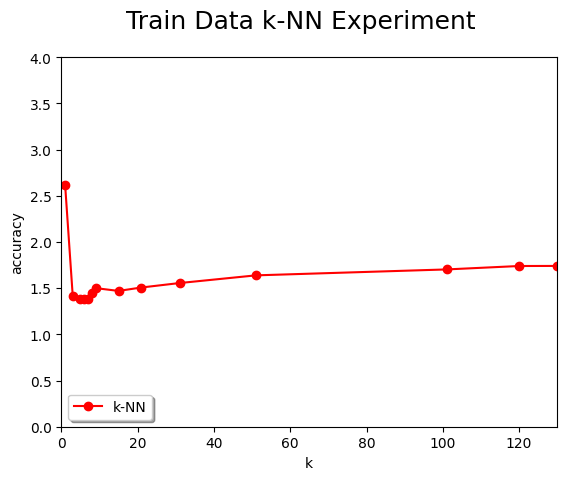

In [ ]:
#knn tuning
import matplotlib.pyplot as plt
import pandas
k_vals          = [1,3,5,6,7,8,9,15,21,31,51,101,120,130,140,150,170,190,220]
kNN_mses        = []
for k in k_vals:
    kkn = KNeighborsRegressor(k)
    kkn.fit(train_data, train_sln)
    prediction = kkn.predict(test_data)
    acc = mean_squared_error(test_sln, prediction)
    kNN_mses.append(acc)
    print("mse=:", acc)

plt.suptitle('Train Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_mses,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

mse=: 2.6202531645569622
mse=: 1.450982981204277
mse=: 1.394159344778368
mse=: 1.38545781633524
mse=: 1.391160320660045
mse=: 1.4459153474598172
mse=: 1.49093690693826
mse=: 1.4620522131716016
mse=: 1.4929475420690284
mse=: 1.5348642867914628
mse=: 1.6104735626045388
mse=: 1.6691628120513091
mse=: 1.701487967215475
mse=: 1.703981349524913
mse=: 1.7119679079391623
mse=: 1.7254764097720572
mse=: 1.7444022796915606
mse=: 1.7532932344236947
mse=: 1.7597788868501332


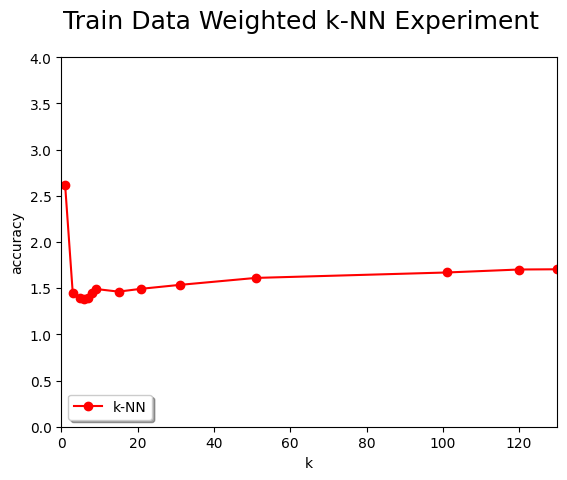

In [ ]:
#weighted knn tuning
import matplotlib.pyplot as plt
import pandas
k_vals          = [1,3,5,6,7,8,9,15,21,31,51,101,120,130,140,150,170,190,220]
kNN_mses        = []
for k in k_vals:
    kkn = KNeighborsRegressor(k, weights='distance')
    kkn.fit(train_data, train_sln)
    prediction = kkn.predict(test_data)
    acc = mean_squared_error(test_sln, prediction)
    kNN_mses.append(acc)
    print("mse=:", acc)

plt.suptitle('Train Data Weighted k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_mses,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

mse=: 1.5696202531645569 1
mse=: 0.9451476793248946 3
mse=: 0.8354430379746836 5
mse=: 0.8765822784810127 6
mse=: 0.858176181865151 7
mse=: 0.8441455696202531 8
mse=: 0.7974683544303798 9
mse=: 0.7723769338959213 15
mse=: 0.7716926433020467 21
mse=: 0.7455445935799997 31
mse=: 0.7406547627738115 51
mse=: 0.722161763738725 101
mse=: 0.711770393811533 120
mse=: 0.7196831698000148 130
mse=: 0.7155082665977783 140
mse=: 0.7236106891701828 150
mse=: 0.7280202356445185 170
mse=: 0.727626845261054 190
mse=: 0.7247049900617218 220
mse=: 0.7246509367088608 250
mse=: 0.7256136427566806 300


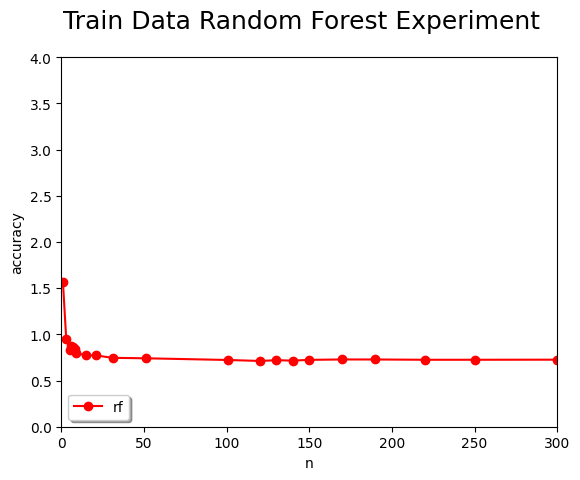

In [ ]:
#Random Forest Tuning
import matplotlib.pyplot as plt
import pandas
n_estemators          = [1,3,5,6,7,8,9,15,21,31,51,101,120,130,140,150,170,190,220,250,300]
n_estemators_mses        = []
for n in n_estemators:
    rf = RandomForestRegressor(n, random_state=20)
    rf.fit(train_data, train_sln)
    prediction = rf.predict(test_data)
    acc = mean_squared_error(test_sln, prediction)
    n_estemators_mses.append(acc)
    print('mse=:', acc, n)

plt.suptitle('Train Data Random Forest Experiment',fontsize=18)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.plot(n_estemators,n_estemators_mses,'ro-',label='rf')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,300,0,4])

plt.show()

mse=: 0.9370472325078304 1
mse=: 0.8265609221430646 3
mse=: 0.7948059188611103 4
mse=: 0.9456716824273214 5
mse=: 1.1904668114835522 6
mse=: 1.4257951986192987 7
mse=: 1.5337460270599537 8
mse=: 1.6197362674151814 9
mse=: 1.860759493670886 15
mse=: 1.860759493670886 21
mse=: 1.860759493670886 31
mse=: 1.860759493670886 51
mse=: 1.860759493670886 101
mse=: 1.860759493670886 120
mse=: 1.860759493670886 130


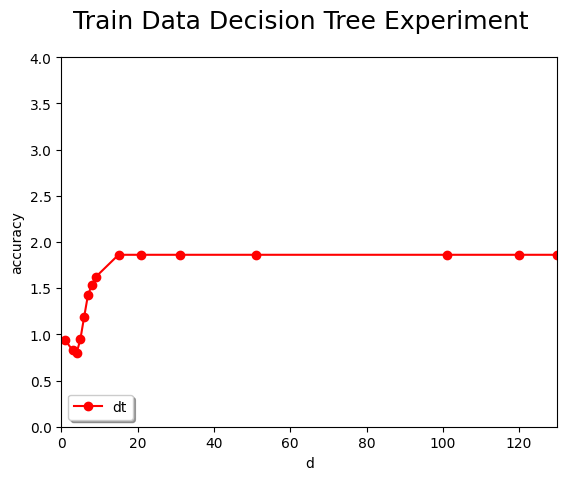

In [ ]:
#Decision Tree Tuning
import matplotlib.pyplot as plt
import pandas
depth_estemators          = [1,3,4,5,6,7,8,9,15,21,31,51,101,120,130]
depth_estemators_mses        = []
for d in depth_estemators:
    dt = DecisionTreeRegressor(max_depth = d, random_state=41)
    dt.fit(train_data, train_sln)
    prediction = dt.predict(test_data)
    acc = mean_squared_error(test_sln, prediction)
    depth_estemators_mses.append(acc)
    print('mse=:', acc, d)



plt.suptitle('Train Data Decision Tree Experiment',fontsize=18)
plt.xlabel('d')
plt.ylabel('accuracy')
plt.plot(depth_estemators,depth_estemators_mses,'ro-',label='dt')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

After I set up my 4 macine learning experiments I needed to fine tune their parameters, such as the k value in KNN. To do this I created a graph for each of the experiments recording the accuracy for many differnt values of parametors. Once I had these graphs I used the parameter value that yeilded the best accuracy and pluged in that value to my original macine learning algarithems.


In [ ]:
Data_main_sex=data[['age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_sex_2=data[['age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]

target = "Walc"
predictors = Data_main_sex.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_sex_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_sex = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_sex)



Normilized knn acc: 1.178270042194093
decision tree acc: 0.8107390418051653
weighted knn acc 1.1423853179922978
random forest acc: 0.7164302039381154
non-normilized knn acc: 1.4113924050632911
non-normilized decision tree acc: 0.8107390418051653
non-normilized weighted knn acc 1.4207269594398104
non-normilized random forest acc: 0.7170956399437411
average acc: 1.02597233152271


Once I had my algarithems set up for the main data set it was easy to tranfor them over to all my other subsets. I pretty much just coppied the code over to each subset just changing the predictors so that that the correct collumn was missing, changing the accuracy. For simplicity I used the same parameters for each of the different machine learning models.

In [ ]:
Data_main_age=data[['sex', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_age_2=data[['sex', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_age.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_age_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_age = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_age)

Normilized knn acc: 1.1831926863572433
decision tree acc: 0.8108834523851268
weighted knn acc 1.153223223681188
random forest acc: 0.7604395218002813
non-normilized knn acc: 1.490857946554149
non-normilized decision tree acc: 0.8108834523851268
non-normilized weighted knn acc 1.488625963089995
non-normilized random forest acc: 0.7619171940928271
average acc: 1.0575029300432421


In [ ]:
Data_main_famsize=data[['sex', 'age', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_famsize_2=data[['sex', 'age', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]

target = "Walc"
predictors = Data_main_famsize.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_famsize_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_famsize = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_famsize)

Normilized knn acc: 1.1040787623066104
decision tree acc: 0.7948059188611103
weighted knn acc 1.0772256308821835
random forest acc: 0.7132972925457103
non-normilized knn acc: 1.3948663853727146
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.4022904317252929
non-normilized random forest acc: 0.7133403656821379
average acc: 0.9993388382796087


In [ ]:
Data_main_Pstatus=data[['sex', 'age', 'famsize', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_Pstatus_2=data[['sex', 'age', 'famsize', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_Pstatus.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_Pstatus_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_Pstatus = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_Pstatus)

Normilized knn acc: 1.0344585091420533
decision tree acc: 0.7948059188611103
weighted knn acc 1.0072091663268852
random forest acc: 0.7066051336146273
non-normilized knn acc: 1.3625175808720111
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.3723051067307164
non-normilized random forest acc: 0.7090541490857947
average acc: 0.9727201854367886


In [ ]:
Data_main_Medu=data[['sex', 'age', 'famsize', 'Pstatus', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_Medu_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_Medu.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_Medu_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_Medu = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_Medu)

Normilized knn acc: 1.1698312236286919
decision tree acc: 0.7948059188611103
weighted knn acc 1.1381037186945908
random forest acc: 0.7190708509142053
non-normilized knn acc: 1.410337552742616
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.4245444580082072
non-normilized random forest acc: 0.7229544655414908
average acc: 1.021806763406503


In [ ]:
Data_main_Fedu=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_Fedu_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_Fedu.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_Fedu_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_Fedu = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_Fedu)

Normilized knn acc: 1.1476793248945147
decision tree acc: 0.8035400960763001
weighted knn acc 1.1204491668649676
random forest acc: 0.7485944092827005
non-normilized knn acc: 1.409282700421941
non-normilized decision tree acc: 0.8035400960763001
non-normilized weighted knn acc 1.415247497959367
non-normilized random forest acc: 0.7491640295358651
average acc: 1.0246871651389944


In [ ]:
Data_main_Traveltime=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_Traveltime_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_Traveltime.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_Traveltime_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_Traveltime = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_Traveltime)

Normilized knn acc: 1.1933895921237692
decision tree acc: 0.7944657463245641
weighted knn acc 1.16339400143424
random forest acc: 0.7450395569620253
non-normilized knn acc: 1.3945147679324894
non-normilized decision tree acc: 0.7944657463245641
non-normilized weighted knn acc 1.3990779545950571
non-normilized random forest acc: 0.7441235935302389
average acc: 1.0285588699033685


In [ ]:
Data_main_studytime=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_studytime_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_studytime.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_studytime_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_studytime = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_studytime)

Normilized knn acc: 1.0907172995780594
decision tree acc: 0.7242935914933907
weighted knn acc 1.0603636421060632
random forest acc: 0.7080098452883266
non-normilized knn acc: 1.4708157524613221
non-normilized decision tree acc: 0.7242935914933907
non-normilized weighted knn acc 1.480753305161005
non-normilized random forest acc: 0.7102637130801689
average acc: 0.9961888425827158


In [ ]:
Data_main_failures=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_failures_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_failures.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_failures_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_failures = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_failures)

Normilized knn acc: 1.111462728551336
decision tree acc: 0.7948059188611103
weighted knn acc 1.0901099121081848
random forest acc: 0.7189996483825598
non-normilized knn acc: 1.4040084388185654
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.414397697313116
non-normilized random forest acc: 0.7194321378340365
average acc: 1.0060028000912524


In [ ]:
Data_main_famsup=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_famsup_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_famsup.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_famsup_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_famsup = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_famsup)

Normilized knn acc: 1.1680731364275665
decision tree acc: 0.7948059188611103
weighted knn acc 1.141173102896444
random forest acc: 0.7072986990154714
non-normilized knn acc: 1.3938115330520395
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.3960703055351318
non-normilized random forest acc: 0.7080740154711674
average acc: 1.013014078765005


In [ ]:
Data_main_activitys=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_activitys_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_activitys.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_activitys_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_activitys = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_activitys)

Normilized knn acc: 1.0256680731364274
decision tree acc: 0.7948059188611103
weighted knn acc 1.0019371043622949
random forest acc: 0.7232753164556962
non-normilized knn acc: 1.3857243319268635
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.393721045958953
non-normilized random forest acc: 0.7249006680731364
average acc: 0.980604797204449


In [ ]:
Data_main_nursery=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_nursery_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_nursery.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_nursery_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_nursery = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_nursery)

Normilized knn acc: 1.1547116736990155
decision tree acc: 0.7948059188611103
weighted knn acc 1.118451242619239
random forest acc: 0.7125377988748243
non-normilized knn acc: 1.4240506329113924
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.4275595142269752
non-normilized random forest acc: 0.7155195147679326
average acc: 1.0178052768527


In [ ]:
Data_main_higher=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_higher_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_higher.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_higher_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_higher = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_higher)

Normilized knn acc: 1.0784106891701826
decision tree acc: 0.7948059188611103
weighted knn acc 1.0574182747285128
random forest acc: 0.7159924402250353
non-normilized knn acc: 1.3966244725738397
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.4026435268008424
non-normilized random forest acc: 0.7171518987341773
average acc: 0.9947316424943513


In [ ]:
Data_main_internet=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_internet_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_internet.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_internet_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_internet = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_internet)

Normilized knn acc: 1.1047819971870605
decision tree acc: 0.7948059188611103
weighted knn acc 1.0742919070089674
random forest acc: 0.7165989803094234
non-normilized knn acc: 1.4099859353023911
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.4151216621612532
non-normilized random forest acc: 0.7176028481012658
average acc: 1.0034993959740726


In [ ]:
Data_main_romantic=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_romantic_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_romantic.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_romantic_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_romantic = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_romantic)

Normilized knn acc: 1.0724331926863573
decision tree acc: 0.7948059188611103
weighted knn acc 1.0532035542863056
random forest acc: 0.7096167369901548
non-normilized knn acc: 1.3895921237693392
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.3957490650671946
non-normilized random forest acc: 0.7099639592123768
average acc: 0.9900213087167435


In [ ]:
Data_main_farmel=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_farmel_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_farmel.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_farmel_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_farmel = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_farmel)

Normilized knn acc: 1.059774964838256
decision tree acc: 0.7948059188611103
weighted knn acc 1.0324255228259225
random forest acc: 0.722732946554149
non-normilized knn acc: 1.4947257383966246
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.4922574354243054
non-normilized random forest acc: 0.7254360056258791
average acc: 1.0146205564234194


In [ ]:
Data_main_freetime=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_freetime_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_freetime.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_freetime_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_freetime = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_freetime)

Normilized knn acc: 1.0348101265822784
decision tree acc: 0.8163991827864091
weighted knn acc 1.0144348527271267
random forest acc: 0.7161119901547117
non-normilized knn acc: 1.4964838255977495
non-normilized decision tree acc: 0.8163991827864091
non-normilized weighted knn acc 1.5015179498125022
non-normilized random forest acc: 0.719551687763713
average acc: 1.0144635997763625


In [ ]:
Data_main_goout=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
Data_main_goout_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_goout.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_goout_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_goout = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_goout)

Normilized knn acc: 1.3983825597749646
decision tree acc: 1.053056751757383
weighted knn acc 1.3580420663099464
random forest acc: 0.8887482419127989
non-normilized knn acc: 1.589310829817159
non-normilized decision tree acc: 1.053056751757383
non-normilized weighted knn acc 1.5882814014464244
non-normilized random forest acc: 0.8892062236286921
average acc: 1.227260603300594


In [ ]:
Data_main_health=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc', 'absences', 'G3']]
Data_main_health_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc', 'absences', 'G3']]
target = "Walc"
predictors = Data_main_health.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_health_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_health = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_health)

Normilized knn acc: 1.059774964838256
decision tree acc: 0.7948059188611103
weighted knn acc 1.0334491828483763
random forest acc: 0.7153621659634317
non-normilized knn acc: 1.2500000000000002
non-normilized decision tree acc: 0.7948059188611103
non-normilized weighted knn acc 1.2573146806220512
non-normilized random forest acc: 0.7147222222222223
average acc: 0.9525293817770697


In [ ]:
Data_main_absences=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G3']]
Data_main_absences_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'G3']]
target = "Walc"
predictors = Data_main_absences.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_absences_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_absences = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_absences)

Normilized knn acc: 1.149789029535865
decision tree acc: 0.766563265228653
weighted knn acc 1.1128254924205052
random forest acc: 0.7102531645569619
non-normilized knn acc: 1.2616033755274263
non-normilized decision tree acc: 0.766563265228653
non-normilized weighted knn acc 1.2525592646135477
non-normilized random forest acc: 0.7088106540084388
average acc: 0.9661209388900064


In [ ]:
Data_main_G3=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
Data_main_G3_2=data[['sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime',
       'failures', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
target = "Walc"
predictors = Data_main_G3.columns.drop(target, 'Dalc')
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc = mean_squared_error(test_sln, prediction)
print('Normilized knn acc:', acc)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc1 = mean_squared_error(test_sln, prediction)
print('decision tree acc:', acc1)
#wheighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc2 = mean_squared_error(test_sln, prediction)
print('weighted knn acc', acc2)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc3 = mean_squared_error(test_sln, prediction)
print('random forest acc:', acc3)


#unweighted
target = "Walc"
predictors = Data_main_G3_2.columns.drop(target, 'Dalc')

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#knn
kkn = KNeighborsRegressor(n_neighbors=6)
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc4 = mean_squared_error(test_sln, prediction)
print('non-normilized knn acc:', acc4)
#dt
dt = DecisionTreeRegressor(max_depth = 4, random_state=41)
dt.fit(train_data, train_sln)
prediction = dt.predict(test_data)
acc5 = mean_squared_error(test_sln, prediction)
print('non-normilized decision tree acc:', acc5)
#weighted knn
kkn = KNeighborsRegressor(n_neighbors=6, weights='distance')
kkn.fit(train_data, train_sln)
prediction = kkn.predict(test_data)
acc6 = mean_squared_error(test_sln, prediction)
print('non-normilized weighted knn acc', acc6)
#rf
rf = RandomForestRegressor(n_estimators=120, random_state=20)
rf.fit(train_data, train_sln)
prediction = rf.predict(test_data)
acc7 = mean_squared_error(test_sln, prediction)
print('non-normilized random forest acc:', acc7)
#average acc
acc_avg_G3 = (acc + acc1 + acc2 + acc3 + acc4 + acc5 + acc6 + acc7)/8
print('average acc:', acc_avg_G3)

Normilized knn acc: 1.162095639943741
decision tree acc: 0.8015147796206038
weighted knn acc 1.1298034181545313
random forest acc: 0.7166288677918425
non-normilized knn acc: 1.3688466947960618
non-normilized decision tree acc: 0.8015147796206038
non-normilized weighted knn acc 1.3613146792666295
non-normilized random forest acc: 0.7170174050632911
average acc: 1.0073420330321632


In [ ]:
#sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu',
#      'traveltime', 'studytime',
#     'failures', 'famsup', 'activities', 'nursery',
#     'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
#     'Walc', 'health', 'absences', 'G3''''
print(acc_avg_main)
print(acc_avg_sex)
print(acc_avg_age)
print(acc_avg_famsize)
print(acc_avg_Pstatus)
print(acc_avg_Medu)
print(acc_avg_Fedu)
print(acc_avg_Traveltime)
print(acc_avg_studytime)
print(acc_avg_failures)
print(acc_avg_famsup)
print(acc_avg_activitys)
print(acc_avg_nursery)
print(acc_avg_higher)
print(acc_avg_internet)
print(acc_avg_romantic)
print(acc_avg_freetime)
print(acc_avg_goout)
print(acc_avg_health)
print(acc_avg_absences)
print(acc_avg_G3)
print(acc_avg_farmel)
print(acc_avg_freetime)



0.9995779328456355
1.02597233152271
1.0575029300432421
0.9993388382796087
0.9727201854367886
1.021806763406503
1.0246871651389944
1.0285588699033685
0.9961888425827158
1.0060028000912524
1.013014078765005
0.980604797204449
1.0178052768527
0.9947316424943513
1.0034993959740726
0.9900213087167435
1.0144635997763625
1.227260603300594
0.9525293817770697
0.9661209388900064
1.0073420330321632
1.0146205564234194
1.0144635997763625
0.026394398677074604
0.05792499719760669
-0.00023909456602677626
-0.026857747408846833
0.02222883056086744
0.02510923229335893
0.02898093705773308
-0.0033890902629196695
0.006424867245616972
0.013436145919369591
-0.01897313564118641
0.018227344007064494
-0.004846290351284144
0.003921463128437108
-0.00955662412889191
0.014885666930727015
0.2276826704549585
-0.04704855106856576
-0.033456993955629066
0.007764100186527734
1.0146205564234194
1.0144635997763625


0.026394398677074604
0.05792499719760669
-0.00023909456602677626
-0.026857747408846833
0.02222883056086744
0.02510923229335893
0.02898093705773308
-0.0033890902629196695
0.006424867245616972
0.013436145919369591
-0.01897313564118641
0.018227344007064494
-0.004846290351284144
0.003921463128437108
-0.00955662412889191
0.014885666930727015
0.2276826704549585
-0.04704855106856576
-0.033456993955629066
0.007764100186527734
0.015042623577783965
0.014885666930727015


<Figure size 640x480 with 0 Axes>

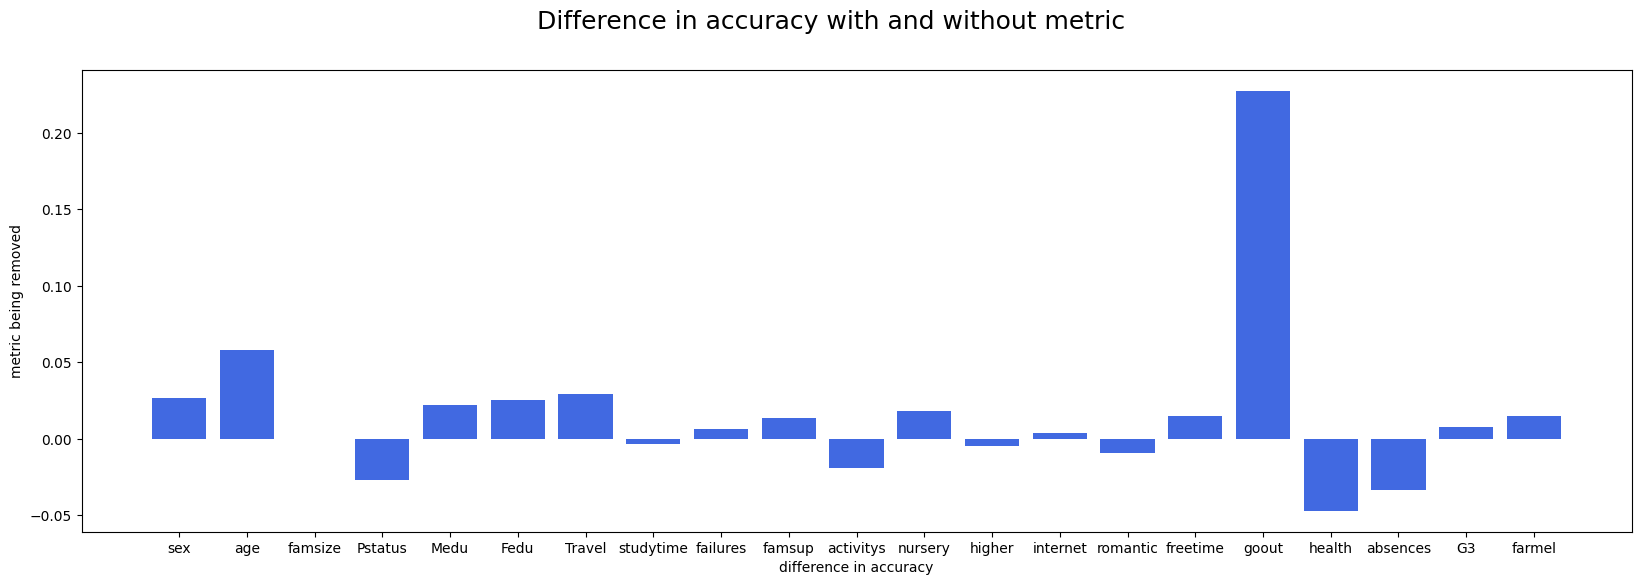

In [ ]:
sex_diff = (acc_avg_sex-acc_avg_main)
print(sex_diff)
age_diff = (acc_avg_age-acc_avg_main)
print(age_diff)
famsize_diff = (acc_avg_famsize-acc_avg_main)
print(famsize_diff)
Pstatus_diff = (acc_avg_Pstatus-acc_avg_main)
print(Pstatus_diff)
Medu_diff = (acc_avg_Medu-acc_avg_main)
print(Medu_diff)
Fedu_diff = (acc_avg_Fedu-acc_avg_main)
print(Fedu_diff)
Traveltime_diff = (acc_avg_Traveltime-acc_avg_main)
print(Traveltime_diff)
studytime_diff = (acc_avg_studytime-acc_avg_main)
print(studytime_diff)
failures_diff = (acc_avg_failures-acc_avg_main)
print(failures_diff)
famsup_diff = (acc_avg_famsup-acc_avg_main)
print(famsup_diff)
activitys_diff = (acc_avg_activitys-acc_avg_main)
print(activitys_diff)
nursery_diff = (acc_avg_nursery-acc_avg_main)
print(nursery_diff)
higher_diff = (acc_avg_higher-acc_avg_main)
print(higher_diff)
internet_diff = (acc_avg_internet-acc_avg_main)
print(internet_diff)
romantic_diff = (acc_avg_romantic-acc_avg_main)
print(romantic_diff)
freetime_diff = (acc_avg_freetime-acc_avg_main)
print(freetime_diff)
goout_diff = (acc_avg_goout-acc_avg_main)
print(goout_diff)
health_diff = (acc_avg_health-acc_avg_main)
print(health_diff)
absences_diff = (acc_avg_absences-acc_avg_main)
print(absences_diff)
G3_diff = (acc_avg_G3-acc_avg_main)
print(G3_diff)
farmel_diff = (acc_avg_farmel - acc_avg_main)
print(farmel_diff)
freetime_diff = (acc_avg_freetime - acc_avg_main)
print(freetime_diff)
diff = (sex_diff, age_diff,  famsize_diff, Pstatus_diff, Medu_diff, Fedu_diff, Traveltime_diff, studytime_diff, failures_diff,
        famsup_diff, activitys_diff, nursery_diff, higher_diff, internet_diff, romantic_diff, freetime_diff, goout_diff,
        health_diff, absences_diff, G3_diff, farmel_diff, freetime_diff)
labels= ['sex' , 'age',  'famsize', 'Pstatus', 'Medu', 'Fedu', 'Travel', 'studytime', 'failures',
         'famsup', 'activitys', 'nursery', 'higher', 'internet', 'romantic', 'freetime', 'goout',
         'health', 'absences', 'G3', 'farmel', 'freetime']

plt.suptitle('Train Data k-NN Experiment',fontsize=18)
plt.figure(figsize=(20, 6))
plt.bar(labels, diff, color='royalblue')
plt.suptitle('Difference in accuracy with and without metric', fontsize=18)
plt.xlabel('difference in accuracy')
plt.ylabel('metric being removed')

plt.show()

Looking at my final visual a few conclusions can be pulled. When the column 'goout' was removed from the dataset we saw the largest drop in accurcy. The column 'goout' rates the amount students go out with their freinds on a scale of 1-5. Alcohol consumption is a social activity so It would make sence that going out with freinds would have a large correlation with alcohol consumption. This gives me the notion that my stratgy of figuring out which facotors play the biggest role in alcohol consumption works. Age and sex were also subsets that had a high posetive differnce in average accurecy which also makes sence because as people get older they probobly drink more. Also men in general can drink more then women because of their body mass. A coupple things however did not make as much sence such as health and absences having a negative differnce in accuracy. Overall these two collumns through the machince learning models over and the on average performed better without them included. I would think health would have a high correlation with drinking bacause of how bad for you it is, however these helth problems could come along more long term which this data wouldnt account for. Drinking also seems like it would cause more absences because of things like hangovers but for some reason there was not a lot of corelation in this data set. In general I think that this experiment was succesfull and worth doing showing that things like going out with freinds, age, and parents education levels have a high effect on alcohol consumption among college students, while health, absences, and marige status of parents do not.

When just loking at my machine learing models, we see that random forest and decision tree performed much better then KKN and weighted KKN. I think that this is mostly due to there being so many collumns that were values of just 1 or 0. This binary output works out much better with decion trees and random forests but not as well with KKN. The unweighted KKN performed especialy poorly when the data was not normalized, so much so that it probobly would have been worth removing compleatly from the final average accuracys. If I was to do this experiment again I would probobly use just random forest or decision tree accuracy insted of taking the average accuracy of all the differnt models because of how much better they worked. This would most likly produse a more accurate final visual showing which columns have the most corelation with alcohol consumption. Also in this data set there is week day alcohol consumption so if I had more time it would be intresting to do the experiment but use weekly alcohol consumption as the target variable insted of weekend alcohol consumption to see how it changes things.

There were quite a few bumps in the road when creating this experiment, the first comming when I realsied I would need only numerical values in my data set. This was a big scare at first but it was easy to convert all these values to 1s and 0s once I figured out what the problem was. Another bump in the road came whenever I needed to change something in my main data set. This would mean that I had to manualy change something in every one of the other subsets of data which took a long time and was a bit tedious. Besides this the experiment was suprisingly not as hard to do as I thought it would be givin how much code it took overall.